Summary:

Reading in two datasets related to some sort of oil/gas production (Time-Series dataset).

Preprocessing and selecting specific columns from these datasets.

Normalizing the selected data.

Converting the numerical values of these datasets into binary (image-like) representations.

Finally, visualizing the preprocessed data in both 2D and 3D.

In [ ]:
#Connect your Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import cm
from tqdm import tqdm

In [ ]:
def float_to_bin(arr, places = 32):
    import matplotlib.pyplot as plt
    bin_list = []
    for number in arr:
        whole, dec = str(number).split(".")
        whole = int(whole)
        dec = int (dec)
        res = bin(whole).lstrip("0b") + "."
        for x in range(places):
            whole, dec = str((decimal_converter(dec)) * 2).split(".")
            dec = int(dec)
            res += whole
        res = res.split('.')[1]
        res = [float(i) for i in res]
        bin_list.append(res)
        #fig = plt.imshow(bin_list,cmap='gray');
    fig=1
    return [bin_list,fig]
def decimal_converter(num):
    while num > 1:
        num /= 10
    return num

In [ ]:
def Split_Dataset(imgdata, step):
    #data = np.append(data,np.repeat(data[-1,],step))
    X, Y =[], []
    for i in range(imgdata.shape[0]-step):
        #print(i,': no of batch')
        d=i+step
        batch = imgdata[i:d,]
        X.append(batch)
        #Y.append(y[d,list(range(y.shape[1]))])
    return np.array(X)#, np.array(Y)

In [ ]:
df = pd.read_excel('drive/My Drive/data_injector_producer.xlsx')
df

,Time (Day),NAJA,Unnamed: 2,NA3D,Unnamed: 4,PROD5,Unnamed: 6,PROD8,Unnamed: 8,PROD9,...,INJ17,Unnamed: 34,INJ19,Unnamed: 36,INJ21,Unnamed: 38,INJ22,Unnamed: 40,INJ23,Unnamed: 42
0,NaN,Well (kg/cm2),Oil Rate (m3/day),Well (kg/cm2),Oil Rate (m3/day),Well (kg/cm2),Oil Rate (m3/day),Well (kg/cm2),Oil Rate (m3/day),Well (kg/cm2),...,Well (kg/cm2),Water Rate (m3/day),Well (kg/cm2),Water Rate (m3/day),Well (kg/cm2),Water Rate (m3/day),Well (kg/cm2),Water Rate (m3/day),Well (kg/cm2),Water Rate (m3/day)
1,1.0,324.32,0,328.78,0,205.59,0,202.68,0,204.69,...,203.61,0,210.16,0,205.54,0,208.92,0,211.06,0
2,2.0,324.32,0,328.78,0,205.59,0,202.68,0,204.69,...,203.61,0,210.16,0,205.54,0,208.92,0,211.06,0
3,3.0,324.32,0,328.78,0,205.59,0,202.68,0,204.69,...,203.61,0,210.16,0,205.54,0,208.92,0,211.06,0
4,4.0,324.32,0,328.78,0,205.59,0,202.68,0,204.69,...,203.61,0,210.16,0,205.54,0,208.92,0,211.06,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10953,10953.0,286.35,304,263.2,351.5,190,132.88,330.39,0,296.8,...,350,1598,350,982,350,2038,350,198.75,350,248
10954,10954.0,286.36,305,263.2,351.5,190,133,330.39,0,296.8,...,350,1596,350,982,350,2036,350,199,350,248
10955,10955.0,286.37,305,263.2,351.5,190,133,330.39,0,296.8,...,350,1598,350,982,350,2038,350,198.75,350,247.5
10956,10956.0,286.38,304,263.21,351.5,190,132.88,330.39,0,296.8,...,350,1596,350,982,350,2038,350,199,350,248


In [ ]:
df2 = pd.read_excel('drive/My Drive/final_data_NA1A.xlsx')
df2

,datetime,BHP(kg/cm2),OR(m3/day),WR(m3/day),GR(m3/day),CO(m3)
0,2013-06-01,324.322937,0.0,0.0,0.0,0.0
1,2013-06-02,324.322937,0.0,0.0,0.0,0.0
2,2013-06-03,324.322937,0.0,0.0,0.0,0.0
3,2013-06-04,324.322937,0.0,0.0,0.0,0.0
4,2013-06-05,324.322937,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
10952,2043-05-27,283.775238,297.0,1546.0,33664.0,8827689.0
10953,2043-05-28,283.777771,296.0,1547.0,33664.0,8827985.0
10954,2043-05-29,283.780334,297.0,1547.0,33664.0,8828282.0
10955,2043-05-30,283.782867,296.0,1546.0,33728.0,8828578.0


In [ ]:
data = df.values[1:,[1,2
                     ,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40,42
                    ]]

data = data.astype('float64')
data_ = df.iloc[1:,[1,2
                     ,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40,42
                    ]]
data_.columns = ['BHP,NAJA','OR,NAJA','P5','P8','P9','P12','P14','P21','P24','P25','I3','I5','I6','I7','I10',
               'I15','I17','I19','I21','I22','I23']
data_

,"BHP,NAJA","OR,NAJA",P5,P8,P9,P12,P14,P21,P24,P25,...,I5,I6,I7,I10,I15,I17,I19,I21,I22,I23
1,324.32,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,324.32,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,324.32,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,324.32,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,324.32,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10953,286.35,304,132.88,0,240,0,0,226.75,0,0,...,636.5,333,1530,161,538,1598,982,2038,198.75,248
10954,286.36,305,133,0,240,0,0,227,0,0,...,636.5,332.5,1528,160,539,1596,982,2036,199,248
10955,286.37,305,133,0,240,0,0,226.75,0,0,...,636.5,333,1530,161,538,1598,982,2038,198.75,247.5
10956,286.38,304,132.88,0,240,0,0,226.75,0,0,...,636.5,332.5,1530,160,539,1596,982,2038,199,248


In [ ]:
clm = np.r_[data_.columns[0:2],df2.columns[3:6],data_.columns[2:]]
data_ = np.c_[data_.values[:,0:2],df2.values[:,3:6],data_.values[:,2:]]
data_ = pd.DataFrame(data_,columns=clm)
data_

,"BHP,NAJA","OR,NAJA",WR(m3/day),GR(m3/day),CO(m3),P5,P8,P9,P12,P14,...,I5,I6,I7,I10,I15,I17,I19,I21,I22,I23
0,324.32,0,0.0,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,324.32,0,0.0,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,324.32,0,0.0,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,324.32,0,0.0,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,324.32,0,0.0,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10952,286.35,304,1546.0,33664.0,8827689.0,132.88,0,240,0,0,...,636.5,333,1530,161,538,1598,982,2038,198.75,248
10953,286.36,305,1547.0,33664.0,8827985.0,133,0,240,0,0,...,636.5,332.5,1528,160,539,1596,982,2036,199,248
10954,286.37,305,1547.0,33664.0,8828282.0,133,0,240,0,0,...,636.5,333,1530,161,538,1598,982,2038,198.75,247.5
10955,286.38,304,1546.0,33728.0,8828578.0,132.88,0,240,0,0,...,636.5,332.5,1530,160,539,1596,982,2038,199,248


In [ ]:
data_[['BHP,NAJA','OR,NAJA','WR(m3/day)','GR(m3/day)','CO(m3)','P12','I5','I6','I15']]

,"BHP,NAJA","OR,NAJA",WR(m3/day),GR(m3/day),CO(m3),P12,I5,I6,I15
0,324.32,0,0.0,0.0,0.0,0,0,0,0
1,324.32,0,0.0,0.0,0.0,0,0,0,0
2,324.32,0,0.0,0.0,0.0,0,0,0,0
3,324.32,0,0.0,0.0,0.0,0,0,0,0
4,324.32,0,0.0,0.0,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
10952,286.35,304,1546.0,33664.0,8827689.0,0,636.5,333,538
10953,286.36,305,1547.0,33664.0,8827985.0,0,636.5,332.5,539
10954,286.37,305,1547.0,33664.0,8828282.0,0,636.5,333,538
10955,286.38,304,1546.0,33728.0,8828578.0,0,636.5,332.5,539


In [ ]:
data = data_[['BHP,NAJA','OR,NAJA','WR(m3/day)','GR(m3/day)','CO(m3)','P12','I5','I6','I15']].values

In [ ]:
features_num = data.copy()
for i in range(features_num.shape[1]):
    features_num[:,i] = (features_num[:,i] - features_num[:,i].mean())/features_num[:,i].std()
features_num.shape
targets = features_num[:,0:5]

Progress: 100%|██████████ [ time left: 00:00 ]


No. of Samples: 10943
Sample Shape: (9, 32, 1)


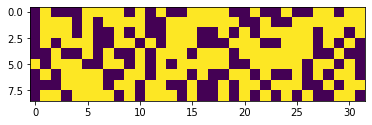

In [ ]:
bin_list = []
fig_list = []
target_list = []
with tqdm(total=len(features_num), desc="Progress", bar_format="{l_bar}{bar} [ time left: {remaining} ]") as pbar:
    for i,j in zip(features_num,range(len(features_num))):
        try:
            bin_num,fig = float_to_bin(i,32)
            bin_list.append(bin_num)
            fig_list.append(fig)
            target_list.append(targets[j])
        except:
            pass
        pbar.update(1)
features_img = np.array(bin_list)
features_img = np.array([i.reshape(i.shape[0],i.shape[1],1) for i in features_img])
targets = np.array(target_list)
print('No. of Samples:',len(features_img))
print('Sample Shape:',features_img[0].shape)
# Data Visualization
plt.imshow(features_img[0].squeeze());
del bin_list

(-0.5, 31.5, 8.5, -0.5)

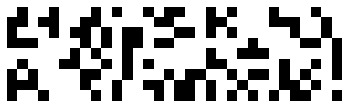

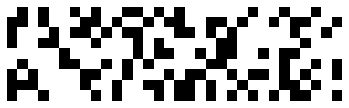

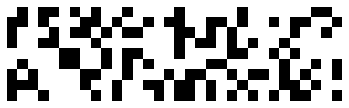

In [ ]:
a,b,c =  features_img[[60,70,80],:,:,0]
A,B,C = features_num[[60,70,80]]
plt.imshow(a,cmap='gray')
plt.axis('off')
plt.figure()
plt.axis('off')
plt.imshow(b,cmap='gray')
plt.figure()
plt.imshow(c,cmap='gray')
plt.axis('off')

In [ ]:
a

array([[1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0.,
        0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
       [0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0.,
        1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1.],
       [0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1.,
        0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1.],
       [0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
        1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0.],
       [1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1.,
        1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0.],
       [1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1.,
        1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0.],
       [0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0.,
        1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0.

In [ ]:
A

array([0.7162211163840043, 2.1503433588457845, -1.270567583602586,
       2.0117383361968324, -1.9899890716980804, -0.7246763598053022,
       -1.3462625161337574, -1.110487392994487, -1.4350153595741573],
      dtype=object)

In [ ]:
x = Split_Dataset(features_img, 20)

In [ ]:
x.shape

(10923, 20, 9, 32, 1)

In [ ]:
x[500,:,:,:,0].shape

(20, 9, 32)

[Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '6'),
 Text(0, 0, '7'),
 Text(0, 0, '8'),
 Text(0, 0, '9'),
 Text(0, 0, '10'),
 Text(0, 0, '11'),
 Text(0, 0, '12'),
 Text(0, 0, '13'),
 Text(0, 0, '14'),
 Text(0, 0, '15'),
 Text(0, 0, '16'),
 Text(0, 0, '17'),
 Text(0, 0, '18'),
 Text(0, 0, '19'),
 Text(0, 0, '20'),
 Text(0, 0, '21'),
 Text(0, 0, '22'),
 Text(0, 0, '23'),
 Text(0, 0, '24'),
 Text(0, 0, '25'),
 Text(0, 0, '26'),
 Text(0, 0, '27'),
 Text(0, 0, '28'),
 Text(0, 0, '29'),
 Text(0, 0, '30'),
 Text(0, 0, '31'),
 Text(0, 0, '32')]

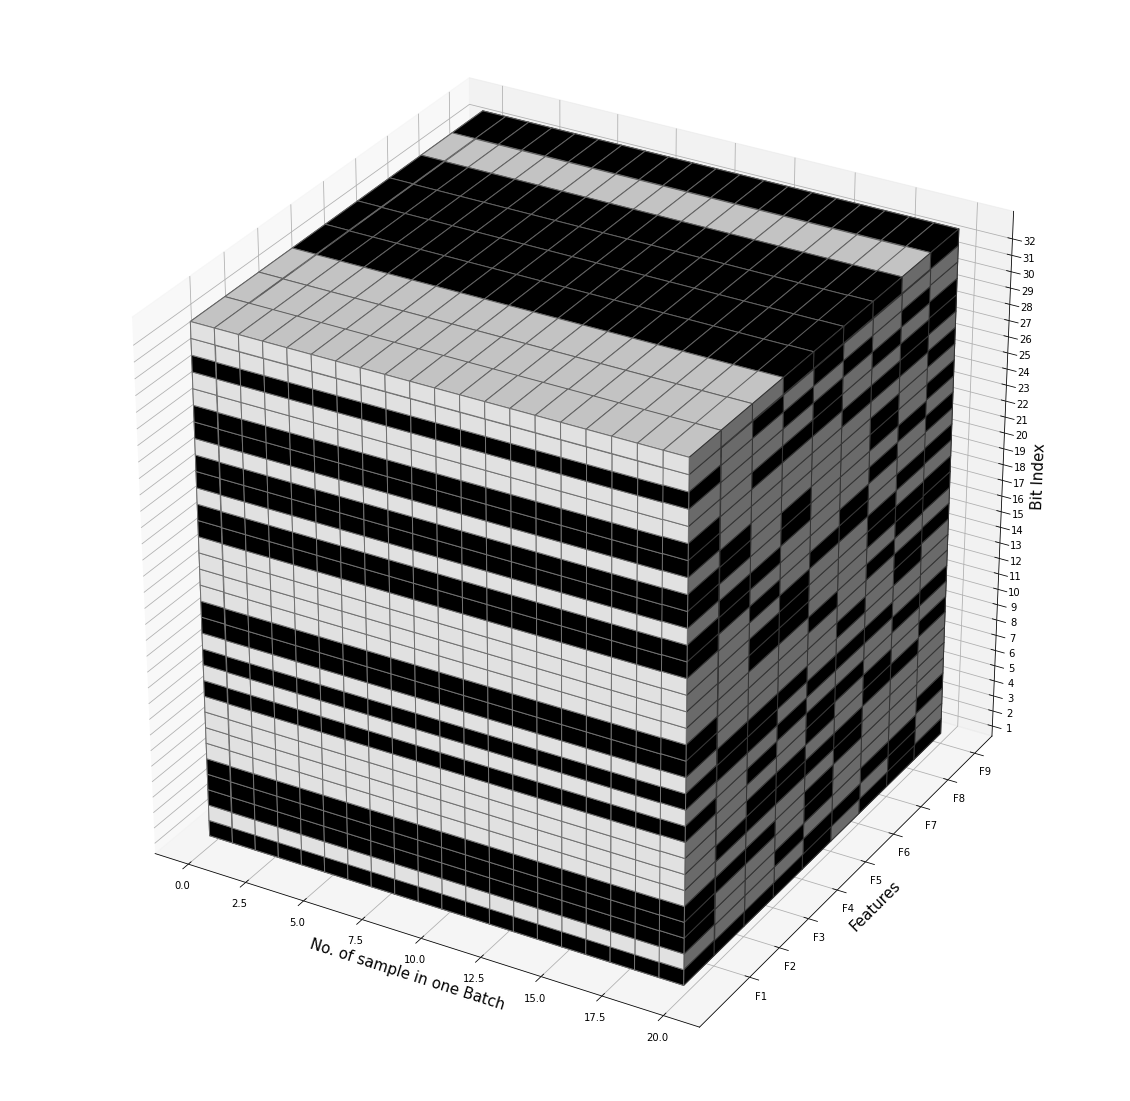

In [ ]:
sample = x[1500,:,:,:,0]
for i in range(sample.shape[0]):
    for j in range(sample.shape[1]):
        for k in range(sample.shape[2]):
            if sample[i,j,k] == 0:
                sample[i,j,k] = 0.00001
colors = cm.gray(x[0,:,:,:,0])
fig = plt.figure(figsize=[20,20])
ax = fig.add_subplot(111, projection='3d')
ax.voxels(sample, facecolors=colors, edgecolors='gray');
plt.xlabel('No. of sample in one Batch',fontsize=15)
plt.ylabel('Features',fontsize=15)
ax.set_zlabel('Bit Index',fontsize=15)
#xticks = [0,1,2,3,4,5,6,7,8,9]
#xticks_label = [str(i+1) for i in xticks]
#ax.set_xticks(xticks)
#ax.set_xticklabels(xticks_label)
yticks = [1,2,3,4,5,6,7,8,9]
yticks_label = ['F'+str(i) for i in yticks]
ax.set_yticks(yticks)
ax.set_yticklabels(yticks_label)
zticks = list(range(32))
zticks_label = [str(i+1) for i in zticks]
ax.set_zticks(zticks)
ax.set_zticklabels(zticks_label)

In [ ]:
x = Split_Dataset(features_img, 200)

In [ ]:
x.shape

(10743, 200, 9, 32, 1)

In [ ]:
x[9000,:,:,:,0].shape

(200, 9, 32)

[Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '6'),
 Text(0, 0, '7'),
 Text(0, 0, '8'),
 Text(0, 0, '9'),
 Text(0, 0, '10'),
 Text(0, 0, '11'),
 Text(0, 0, '12'),
 Text(0, 0, '13'),
 Text(0, 0, '14'),
 Text(0, 0, '15'),
 Text(0, 0, '16'),
 Text(0, 0, '17'),
 Text(0, 0, '18'),
 Text(0, 0, '19'),
 Text(0, 0, '20'),
 Text(0, 0, '21'),
 Text(0, 0, '22'),
 Text(0, 0, '23'),
 Text(0, 0, '24'),
 Text(0, 0, '25'),
 Text(0, 0, '26'),
 Text(0, 0, '27'),
 Text(0, 0, '28'),
 Text(0, 0, '29'),
 Text(0, 0, '30'),
 Text(0, 0, '31'),
 Text(0, 0, '32')]

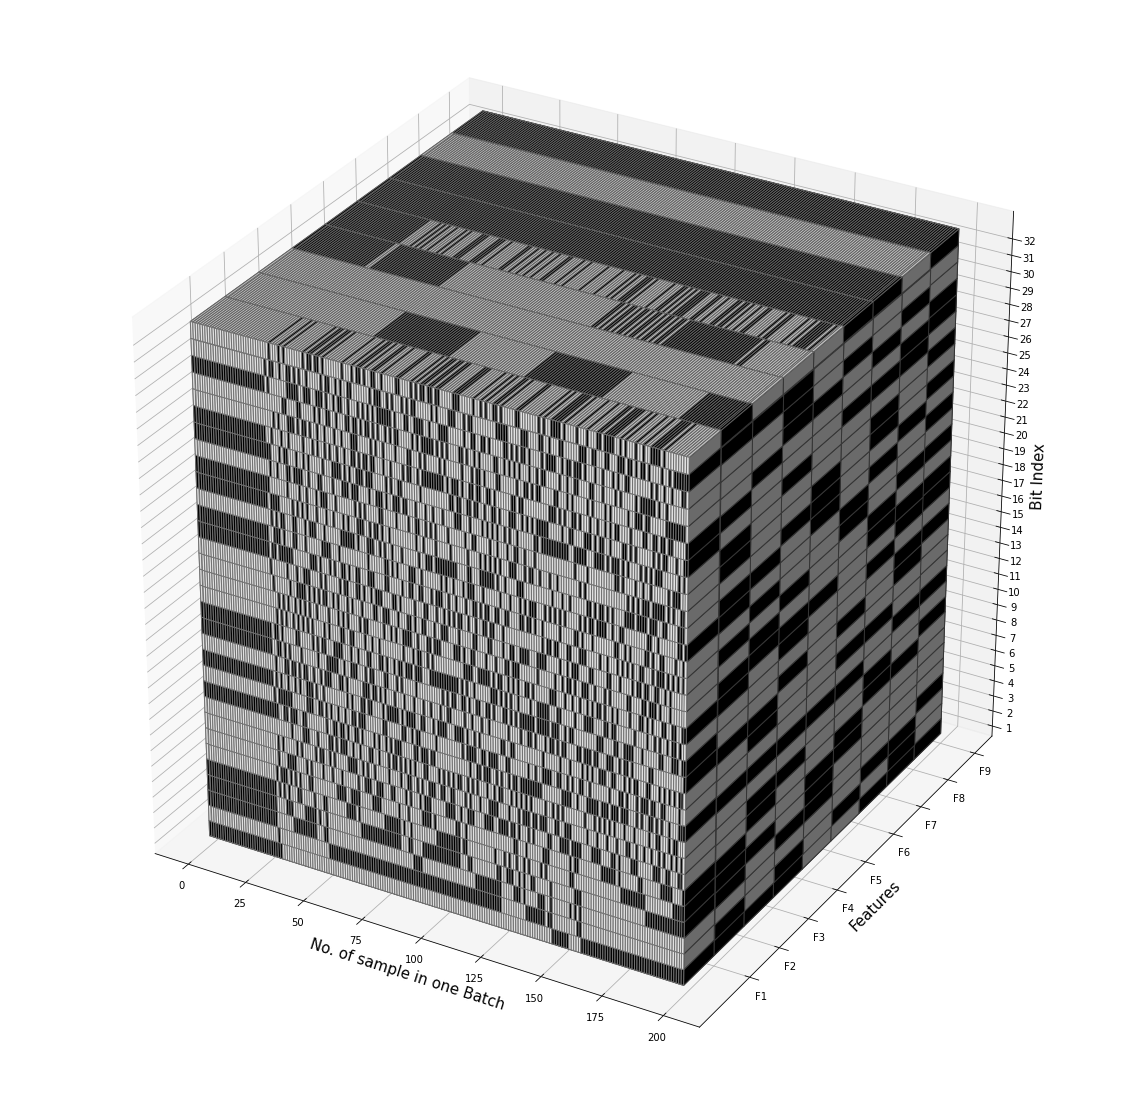

In [ ]:
sample = x[9000,:,:,:,0]
for i in range(sample.shape[0]):
    for j in range(sample.shape[1]):
        for k in range(sample.shape[2]):
            if sample[i,j,k] == 0:
                sample[i,j,k] = 0.00001
colors = cm.gray(x[0,:,:,:,0])
fig = plt.figure(figsize=[20,20])
ax = fig.add_subplot(111, projection='3d')
ax.voxels(sample, facecolors=colors, edgecolors='gray');
plt.xlabel('No. of sample in one Batch',fontsize=15)
plt.ylabel('Features',fontsize=15)
ax.set_zlabel('Bit Index',fontsize=15)
#xticks = [0,1,2,3,4,5,6,7,8,9]
#xticks_label = [str(i+1) for i in xticks]
#ax.set_xticks(xticks)
#ax.set_xticklabels(xticks_label)
yticks = [1,2,3,4,5,6,7,8,9]
yticks_label = ['F'+str(i) for i in yticks]
ax.set_yticks(yticks)
ax.set_yticklabels(yticks_label)
zticks = list(range(32))
zticks_label = [str(i+1) for i in zticks]
ax.set_zticks(zticks)
ax.set_zticklabels(zticks_label)